<a href="https://colab.research.google.com/github/jaimeisaac2020/Python-analsisis-basicos/blob/mi-github/Ejercicio_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio Python de K-means
Realizaremos un ejercicio de prueba para comprender como funciona este algoritmo

# Un ejemplo K-Means en Python con Sklearn

Como ejemplo utilizaremos de entradas un conjunto de datos que obtuve de un proyecto propio, en el que se analizaban rasgos de la personalidad de usuarios de Twitter. He filtrado a 140 “famosos” del mundo en diferentes areas: deporte, cantantes, actores, etc. Basado en una metodología de psicología conocida como “Ocean: The Big Five” tendemos como características de entrada:

- usuario (el nombre en Twitter)
- “op” = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte
- “co” =Conscientiousness – grado de orden, prolijidad, organización
- “ex” = Extraversion – grado de timidez, solitario o participación ante el grupo social
- “ag” = Agreeableness – grado de empatía con los demás, temperamento
- “ne” = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.
- Wordcount – Cantidad promedio de palabras usadas en sus tweets
- Categoria – Actividad laboral del usuario (actor, cantante, etc.)  


Utilizaremos el algoritmo K-means para que agrupe estos usuarios -no por su actividad laboral- si no, por sus similitudes en la personalidad. Si bien tenemos 8 columnas de entrada, sólo utilizaremos 3 en este ejemplo, de modo que podamos ver en un gráfico tridimensional -y sus proyecciones a 2D- los grupos resultantes. Pero para casos reales, podemos utilizar todas las dimensiones que necesitemos. Una de las hipótesis que podríamos tener es: “Todos los cantantes tendrán personalidad parecida” (y así con cada rubro laboral). Pues veremos si lo probamos, o por el contrario, los grupos no están relacionados necesariamente con la actividad de estas Celebridades.

## Agrupar usuarios Twitter de acuerdo a su personalidad con K-means

Implementando K-means en Python con Sklearn
Comenzaremos importando las librerías que nos asistirán para ejecutar el algoritmo y graficar.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

## Cargamos los datos de entrada del archivo csv

In [ ]:
dataframe = pd.read_csv(r"analisis.csv")
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [ ]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


**El archivo contiene diferenciadas 9 categorías -actividades laborales- que son:**

1. Actor/actriz
2. Cantante
3. Modelo
4. Tv, series
5. Radio
6. Tecnología
7. Deportes
8. Politica
9. Escritor  

Para saber cuantos registros tenemos de cada uno hacemos:

In [ ]:
#vemos cuantos usuarios hay de cada categoria
print(dataframe.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


Las categorias son: 1-actores 2-cantantes 3-modelo 4-TV 5-radio 6-tecnología 7-deportes 8-politica 9-escritor

In [ ]:
X1=dataframe.iloc[:,[1,2,3,4,5,6]].values
y1=dataframe.iloc[:,[7]].values

In [ ]:
print(X1)

[[ 34.297953  28.148819  41.948819  29.370315   9.841575  37.0945  ]
 [ 44.986842  20.525865  37.938947  24.279098  10.362406  78.797   ]
 [ 41.733854  13.745417  38.999896  34.645521   8.836979  49.2604  ]
 [ 40.377154  15.377462  52.337538  31.082154   5.032231  80.4538  ]
 [ 36.664677  19.642258  48.530806  31.138871   7.305968  47.0645  ]
 [ 33.531771  16.183958  43.211667  25.786667  11.930417  40.1354  ]
 [ 31.851102  13.735591  47.182362  19.594331   6.905591  91.5197  ]
 [ 31.865118  16.58811   55.377559  36.258346   7.464646  66.2835  ]
 [ 46.393488  25.451163  39.93031   16.658062   8.452791 145.1473  ]
 [ 39.436667  26.135303  32.966288  32.291591  10.956591 177.5606  ]
 [ 52.750992  24.706565  41.698855  17.057176   8.279847  97.2901  ]
 [ 41.328182  20.241212  39.173333  21.070505   7.823535  32.8788  ]
 [ 54.407727  26.992121  34.104318  18.771818   8.867197 125.3409  ]
 [ 47.610076  20.343788  39.439545  21.438409   8.865303 128.8561  ]
 [ 39.435149  20.091791  41.479403

In [ ]:
from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np

In [ ]:
prueba=SelectKBest(score_func=chi2,k=3)
entrenamiento=prueba.fit(X1,y1)

In [ ]:
print(entrenamiento.scores_)

[ 70.69576152  22.29794213  28.57969309  84.37974755  27.88940925
 483.3299997 ]


## Visualizamos los datos

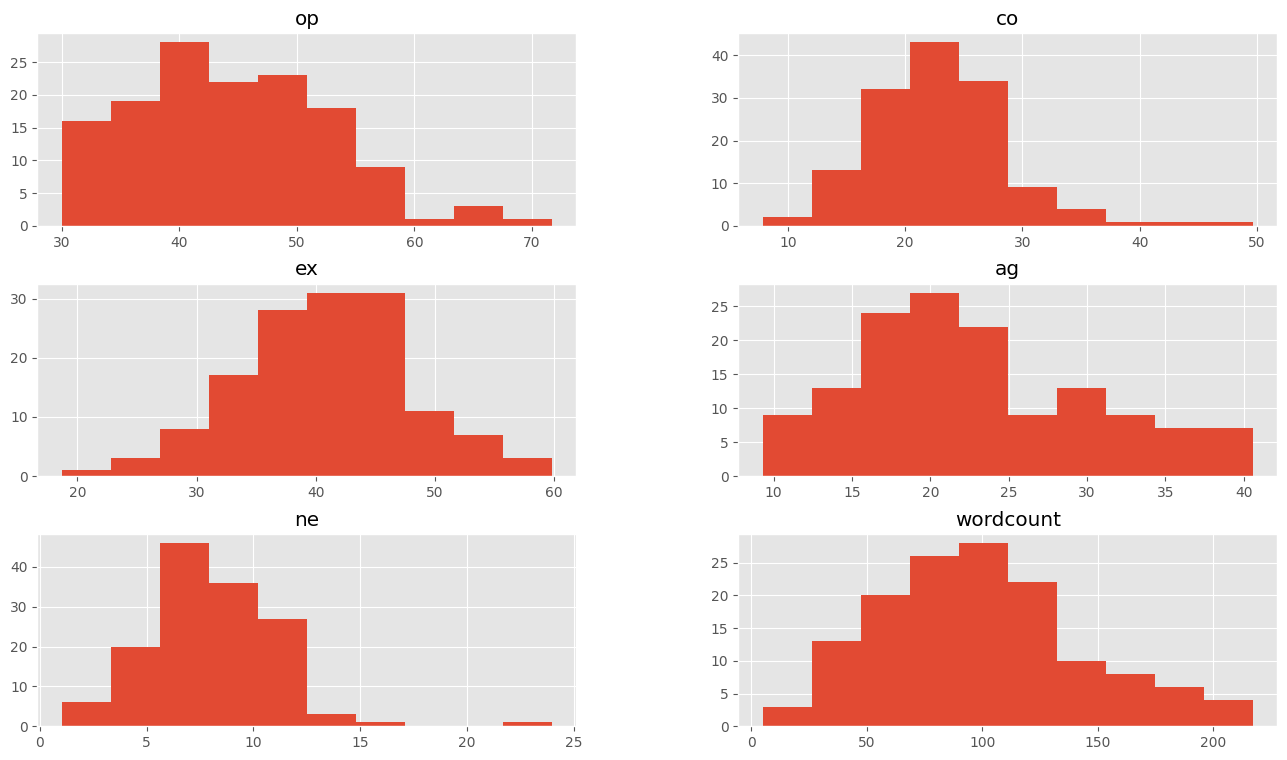

In [ ]:
dataframe.drop(['categoria'],axis=1).hist()
plt.show()

En este caso seleccionamos 3 dimensiones: op, ex y ag y las cruzamos para ver si nos dan alguna pista de su agrupación y la relación con sus categorías.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


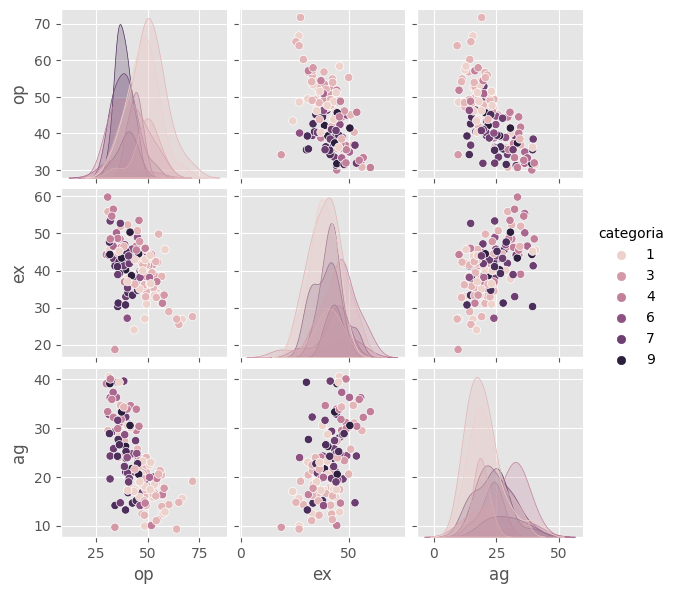

In [ ]:
sb.pairplot(dataframe.dropna(), hue='categoria',size=2,vars=["op","ex","ag"],kind='scatter')

Revisando la gráfica no pareciera que haa algún tipo de agrupación o correlación entre los usuarios y sus categorías

Concretamos la estructura de datos que utilizaremos para alimentar el algoritmo. Como se ve, sólo cargamos las columnas op, ex y ag en nuestra variable X.

## Creamos el modelo

In [ ]:
#Para el ejercicio, sólo seleccionamos 3 dimensiones, para poder graficarlo
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])
X.shape

(140, 3)

In [ ]:
fig = plt.figure(figsize=(6,4))
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
#NOTA: asignamos la posición cero del array repetida pues las categorias comienzan en id 1.
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
plt.show()

<Figure size 600x400 with 0 Axes>

# Buscamos el valor K

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

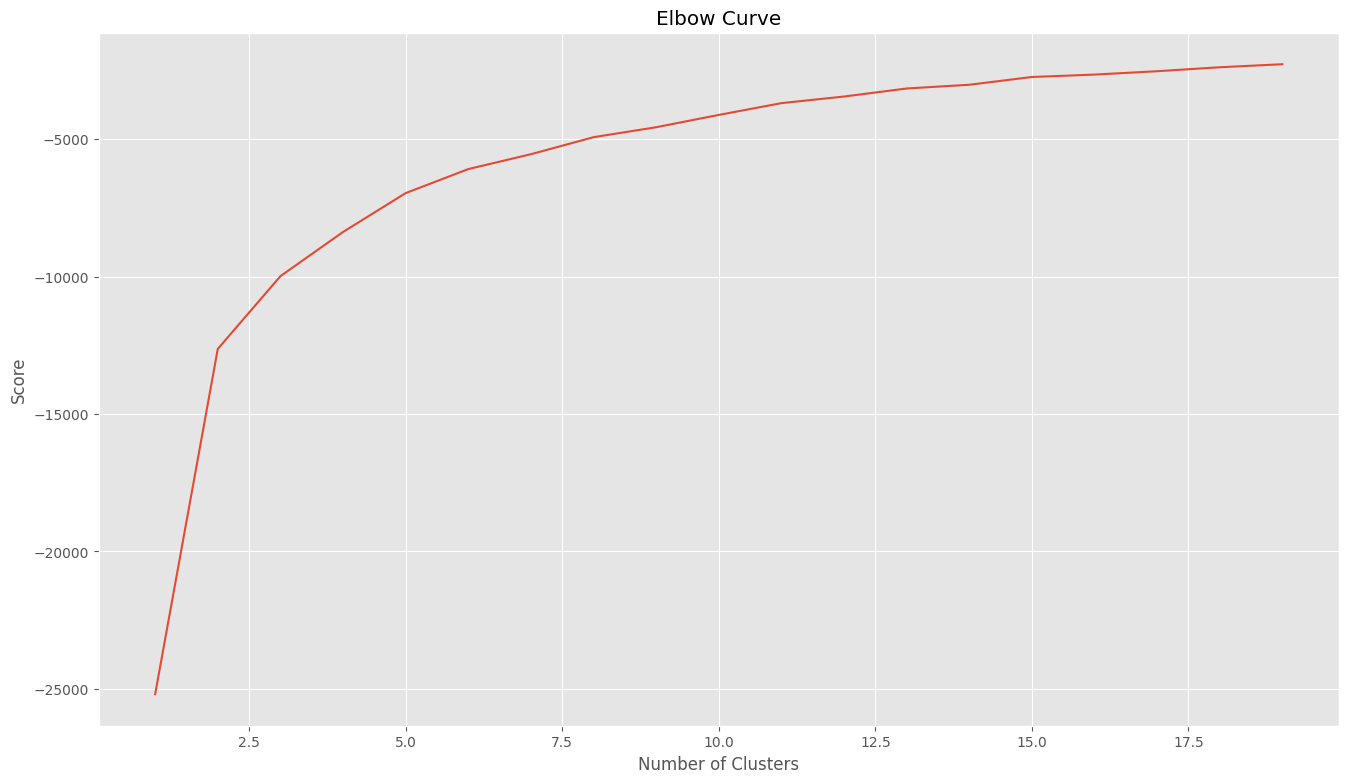

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
# Para el ejercicio, elijo 5 como un buen valor de K. Pero podría ser otro.
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[35.98785863 47.6500119  34.38723913]
 [50.15530371 40.81295548 17.39048745]
 [39.11608832 44.2747971  24.07124206]
 [58.70462307 30.53566167 15.72207033]
 [42.66891482 33.31008136 21.11530482]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.predict(X)
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

<Figure size 1600x900 with 0 Axes>

Aqui podemos ver que el Algoritmo de K-Means con K=5 ha agrupado a los 140 usuarios Twitter por su personalidad, teniendo en cuenta las 3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes. Pareciera que no hay necesariamente una relación en los grupos con sus actividades de Celebrity.

Haremos 3 gráficas en 2 dimensiones con las proyecciones a partir de nuestra gráfica 3D para que nos ayude a visualizar los grupos y su clasificación:

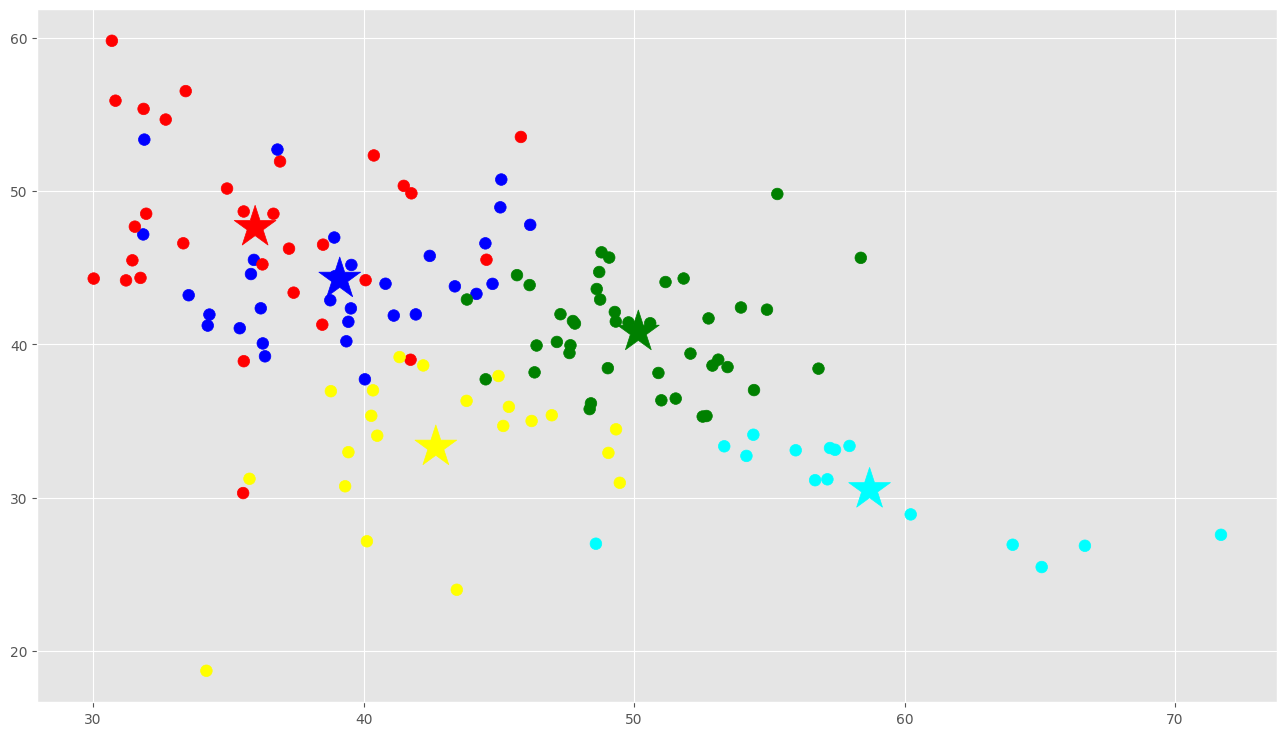

In [ ]:
# Hacemos una proyección a 2D con los diversos ejes
f1 = dataframe['op'].values
f2 = dataframe['ex'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

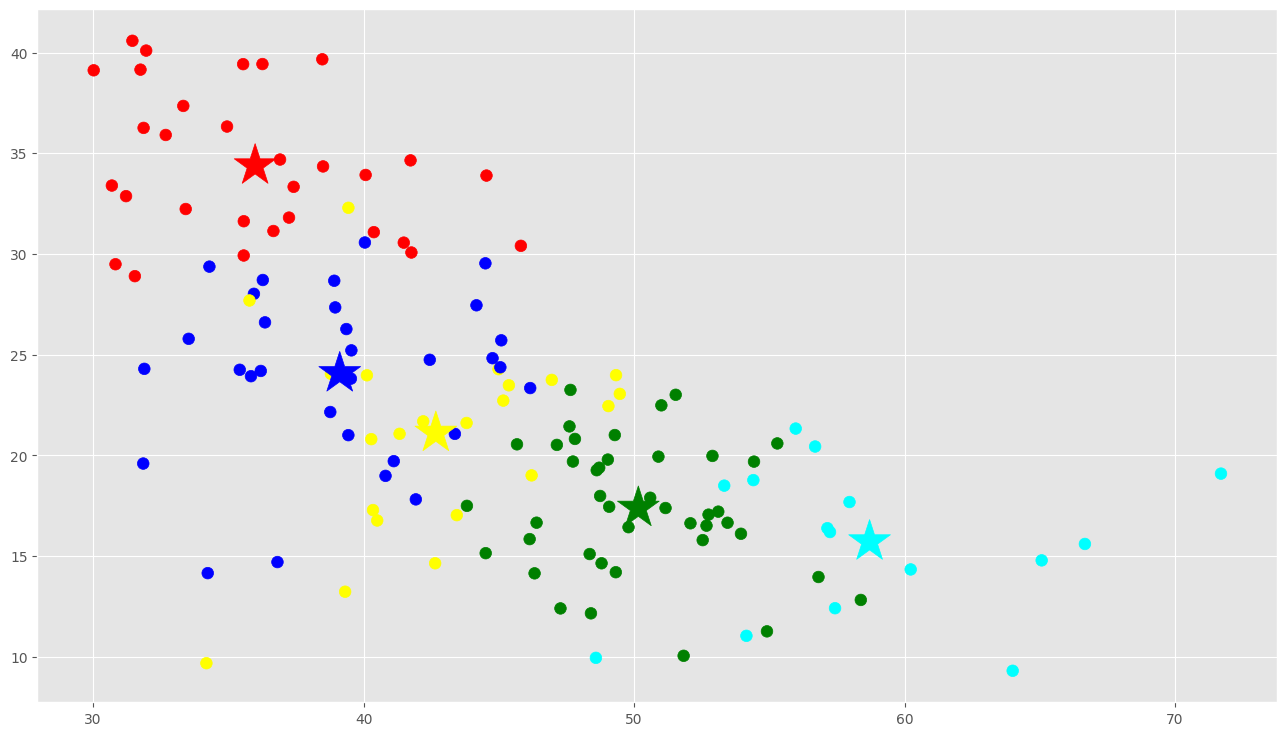

In [ ]:
# Hacemos una proyección a 2D con los diversos ejes
f1 = dataframe['op'].values
f2 = dataframe['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

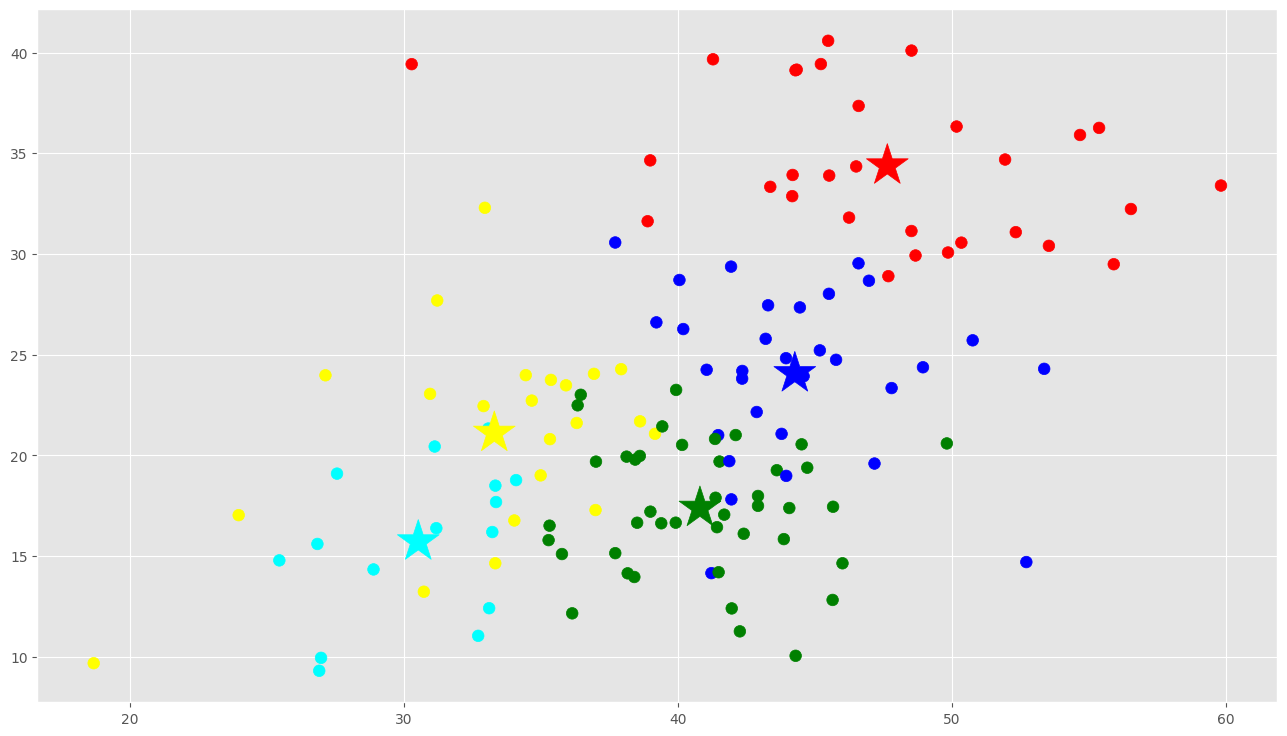

In [ ]:
f1 = dataframe['ex'].values
f2 = dataframe['ag'].values

'''
# este codigo comentado agrega las categorias sobre cada punto
for label, x, y in zip(dataframe['categoria'].values, f1, f2):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
'''
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [ ]:
# contamos cuantos usuarios hay en cada grupo
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,30
1,green,42
2,blue,31
3,cyan,15
4,yellow,22


In [ ]:
# Veamos cuantos usuarios en cada categoria hay en el grupo 0
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,3.0
2,2,4.0
3,3,NaN
4,4,12.0
5,5,3.0
6,6,NaN
7,7,3.0
8,8,2.0
9,9,3.0


In [ ]:
# Veamos cuantos usuarios en cada categoria hay en el grupo 1
group_referrer_index = copy['label'] ==1
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,11.0
2,2,15.0
3,3,6.0
4,4,3.0
5,5,1.0
6,6,2.0
7,7,2.0
8,8,1.0
9,9,1.0


In [ ]:
# Veamos cuantos usuarios en cada categoria hay en el grupo 2
group_referrer_index = copy['label'] ==2
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,2.0
2,2,4.0
3,3,1.0
4,4,1.0
5,5,NaN
6,6,5.0
7,7,9.0
8,8,8.0
9,9,1.0


In [ ]:
#imprimimos en pantalla los usuarios con categoria 2 del grupo
for index, row in group_referrals.iterrows():
    if row["categoria"] == 2:
        print (row["usuario"], row["categoria"],row["label"])

David_Busta 2 2
drexlerjorge 2 2
jtimberlake 2 2
pabloalboran 2 2


In [ ]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([121,  21, 107,  82,  91])

In [ ]:
users=dataframe['usuario'].values
for row in closest:
    print(users[row])

SerranoIsmael
carmenelectra
Pablo_Iglesias_
JudgeJudy
kobebryant


In [ ]:
#miramos los usuarios del grupo 0
for index, row in copy.iterrows():
    if row["label"] == 0:
        print (row["usuario"], row["categoria"],row["label"])

albertochicote 4 0
AlejandroSanz 2 0
alfredocasero1 4 0
andykusnetzoff 5 0
Berto_Romero 4 0
Buenafuente 4 0
CarlosAuryn 2 0
CasillasWorld 7 0
CristiPedroche 4 0
DaniMateoAgain 5 0
DANIROVIRA 1 0
davidbisbal 2 0
eva_hache 1 0
GeorgeHWBush 8 0
JesusCalleja 4 0
jordievole 4 0
jordiGlez 4 0
josjaviersantos 9 0
JPVarsky 5 0
manuginobili 7 0
maria_patino 4 0
NadalMiki 4 0
perezreverte 9 0
pnique 8 0
porliniers 9 0
ristomejide 4 0
SerranoIsmael 2 0
XabiAlonso 7 0
XaviRodriguez 4 0
_josecoronado_ 1 0


In [ ]:
#miramos los usuarios del grupo 1
for index, row in copy.iterrows():
    if row["label"] == 1:
        print (row["usuario"], row["categoria"],row["label"])

andyroddick 7 1
AngelAlessandra 3 1
AvrilLavigne 2 1
BarRefaeli 3 1
britneyspears 2 1
carmenelectra 3 1
celinedion 2 1
CindyCrawford 3 1
CourteneyCox 1 1
Courtney 2 1
Cristiano 7 1
EmWatson 1 1
epunset 6 1
EvaLongoria 3 1
Fergie 2 1
gwenstefani 2 1
heidiklum 3 1
IamStevenT 2 1
JessieJ 2 1
jimlangevin 8 1
jimmyfallon 4 1
justdemi 1 1
kanyewest 2 1
katyperry 2 1
KevinSpacey 1 1
KidRock 2 1
LennyKravitz 2 1
LeoDiCaprio 1 1
MariahCarey 2 1
martinvars 6 1
MelanieGriffith 1 1
MileyCyrus 1 1
Oprah 4 1
PaulaMeliveo 5 1
paulocoelho 9 1
RealHughJackman 1 1
shakira 2 1
taylorswift13 2 1
TheEllenShow 4 1
TheReal_Jlh 1 1
TomCruise 1 1
ZacEfron 1 1


In [ ]:
#miramos los usuarios del grupo 2
for index, row in copy.iterrows():
    if row["label"] == 2:
        print (row["usuario"], row["categoria"],row["label"])

3gerardpique 7 2
alo_oficial 7 2
andresiniesta8 7 2
BarackObama 8 2
BillGates 6 2
CFKArgentina 8 2
charliesheen 1 2
ChristianG_7 4 2
Clyburn 8 2
David_Busta 2 2
DidacLee 6 2
drexlerjorge 2 2
edans 6 2
EdwardNorton 1 2
FALCAO 7 2
FernandezAnibal 8 2
fieritacatalano 6 2
ierrejon 8 2
iescolar 9 2
JesusEncinar 6 2
JohnKerry 8 2
jtimberlake 2 2
KAKA 7 2
KateUpton 3 2
lorenzo99 7 2
pabloalboran 2 2
Pablo_Iglesias_ 8 2
paugasol 7 2
RafaelNadal 7 2
sanchezcastejon 8 2
usainbolt 7 2


In [ ]:
#miramos los usuarios del grupo 3
for index, row in copy.iterrows():
    if row["label"] == 3:
        print (row["usuario"], row["categoria"],row["label"])

aplusk 1 3
enrique305 2 3
foofighters 2 3
HilaryDuff 2 3
IanMcKellen 1 3
JerrySeinfeld 1 3
jessicaalba 1 3
JLo 2 3
JudgeJudy 4 3
MeganFox516 1 3
OfficialAdele 2 3
rihanna 2 3
springsteen 2 3
victoriabeckham 3 3
xoellopez 2 3


In [ ]:
#miramos los usuarios del grupo 4
for index, row in copy.iterrows():
    if row["label"] == 4:
        print (row["usuario"], row["categoria"],row["label"])

aguerosergiokun 7 4
andy_murray 7 4
antoniobanderas 1 4
Carrie_Br4dshaw 3 4
cesarmillan 4 4
Diane_Keaton 1 4
GwynethPaltrow 1 4
HerreraBeutler 8 4
HillaryClinton 8 4
hughlaurie 4 4
jiminhofe 8 4
jk_rowling 9 4
justinbieber 2 4
kobebryant 7 4
ladygaga 2 4
Rep_Hunter 8 4
SarahPalinUSA 8 4
SJP 1 4
SSantiagosegura 1 4
stevewoz 6 4
thelittleidiot 2 4
tomhanks 1 4


In [ ]:
#miramos los usuarios del grupo 5
for index, row in copy.iterrows():
    if row["label"] == 5:
        print (row["usuario"], row["categoria"],row["label"])

# Clasificación de nuevos registros

In [ ]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta personality traits
new_labels = kmeans.predict(X_new)
print(new_labels)

#NOTA: en el array podemos poner más de un array para evaluar a varios usuarios nuevos a la vez

[2]


NOTA FINAL: Los resultados obtenidos pueden varias de ejecución en ejecución pues al inicializar aleatoriamente los centroids, podemos obtener grupos distintos o los mismos pero en distinto orden y color

In [ ]:
X_new = np.array([[34.297953, 41.948819, 29.370315]]) #davidguetta personality traits
new_labels = kmeans.predict(X_new)
print(new_labels)

[2]


In [ ]:
X

array([[34.297953, 41.948819, 29.370315],
       [44.986842, 37.938947, 24.279098],
       [41.733854, 38.999896, 34.645521],
       [40.377154, 52.337538, 31.082154],
       [36.664677, 48.530806, 31.138871],
       [33.531771, 43.211667, 25.786667],
       [31.851102, 47.182362, 19.594331],
       [31.865118, 55.377559, 36.258346],
       [46.393488, 39.93031 , 16.658062],
       [39.436667, 32.966288, 32.291591],
       [52.750992, 41.698855, 17.057176],
       [41.328182, 39.173333, 21.070505],
       [54.407727, 34.104318, 18.771818],
       [47.610076, 39.439545, 21.438409],
       [39.435149, 41.479403, 21.004104],
       [48.617348, 43.617955, 19.263258],
       [40.073543, 44.194724, 33.921417],
       [43.37292 , 43.792263, 21.067737],
       [49.792403, 41.435581, 16.433953],
       [30.020465, 44.29969 , 39.117984],
       [36.909459, 51.947297, 34.687568],
       [50.594462, 41.383154, 17.896538],
       [34.186667, 18.693542,  9.682292],
       [31.215455, 44.180909, 32.8